RMSE 
 TEST DATA IS 617233.105500275 
 TRAIN DATA IS 707587.711095815 

ACCURACY OF 
 TRAIN DATA 0.8056714022861694, 
 TEST DATA 0.784598646587837 

AVERAGE CROSS VALIDAION SCORE IS  -2327.973890751036


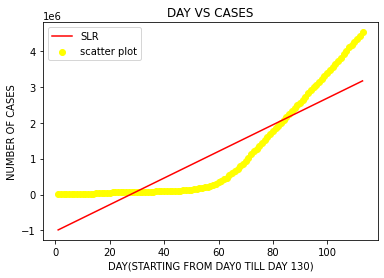

In [316]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

#DATA SET IMPORT
xdf = pd.read_csv('https://raw.githubusercontent.com/eladcn/coronavirus_prediction/master/datasets/cases_dataset_2020-05-15.csv')
ydf = pd.read_csv('https://raw.githubusercontent.com/eladcn/coronavirus_prediction/master/datasets/deaths_dataset_2020-05-15.csv')

x = xdf.iloc[:,0]
Y = xdf.iloc[:,-1]
x=np.array(x).reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=0)

model1 = LinearRegression()
model1.fit(X_train,Y_train)

P_train_pred = model1.predict(X_train)
P_test_pred = model1.predict(X_test)


#MSE OF TRAIN AND TEST DATA
train_mse = mean_squared_error(Y_train,P_train_pred)
test_mse = mean_squared_error(Y_test,P_test_pred)

#R2 SCORE OF TRAIN AND TEST DATA
r2train = r2_score(Y_train,P_train_pred)
r2test = r2_score(Y_test,P_test_pred)

#CROSS VALIDATION TO GET BETTER ACCURACY
cv_PR = cross_val_score(LinearRegression(),x,y,cv=7)

print('RMSE \n TEST DATA IS {} \n TRAIN DATA IS {} \n'.format(np.sqrt(train_mse),np.sqrt(test_mse)))
print('ACCURACY OF \n TRAIN DATA {}, \n TEST DATA {} \n'.format(r2train,r2test))
print('AVERAGE CROSS VALIDAION SCORE IS  {}'.format(np.mean(cv_PR)))

#GRAPH PLOTTING
plt.scatter(x, y, color = 'yellow',label='scatter plot') 
plt.plot([min(X_train), max(X_train)], [min(P_test_pred), max(P_test_pred)], color='red',label='SLR')
plt.xlabel('DAY(STARTING FROM DAY0 TILL DAY 130)')
plt.ylabel('NUMBER OF CASES')
plt.title('DAY VS CASES')
plt.legend()


RMSE 
 TEST DATA IS 59562.90026612385 
 TRAIN DATA IS 55450.357717483595 

ACCURACY OF 
 TRAIN DATA 0.9981903692529265, 
 TEST DATA 0.998677192743767 

AVERAGE CROSS VALIDAION SCORE IS  -2327.973890751036


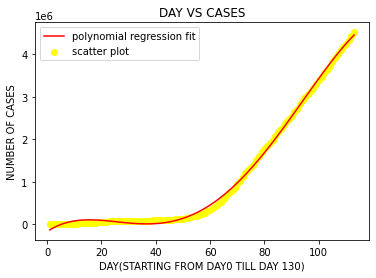

In [317]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

#DATA SET IMPORT
xdf = pd.read_csv('https://raw.githubusercontent.com/eladcn/coronavirus_prediction/master/datasets/cases_dataset_2020-05-15.csv')
ydf = pd.read_csv('https://raw.githubusercontent.com/eladcn/coronavirus_prediction/master/datasets/deaths_dataset_2020-05-15.csv')

x = xdf.iloc[:,0]
Y = xdf.iloc[:,-1]
x=np.array(x).reshape(-1,1)
x_poly = PolynomialFeatures(degree = 4).fit_transform(x)
X_train, X_test, Y_train, Y_test = train_test_split(x_poly, y, test_size=0.1, random_state=0)

model1 = LinearRegression()
model1.fit(X_train,Y_train)

P_train_pred = model1.predict(X_train)
P_test_pred = model1.predict(X_test)
xp_pred = model1.predict(x_poly)


#MSE OF TRAIN AND TEST DATA
train_mse = mean_squared_error(Y_train,P_train_pred)
test_mse = mean_squared_error(Y_test,P_test_pred)

#R2 SCORE OF TRAIN AND TEST DATA
r2train = r2_score(Y_train,P_train_pred)
r2test = r2_score(Y_test,P_test_pred)

#CROSS VALIDATION TO GET BETTER ACCURACY
cv_PR = cross_val_score(LinearRegression(),x,y,cv=7)

print('RMSE \n TEST DATA IS {} \n TRAIN DATA IS {} \n'.format(np.sqrt(train_mse),np.sqrt(test_mse)))
print('ACCURACY OF \n TRAIN DATA {}, \n TEST DATA {} \n'.format(r2train,r2test))
print('AVERAGE CROSS VALIDAION SCORE IS  {}'.format(np.mean(cv_PR)))

#GRAPH PLOTTING
plt.scatter(x, y, color = 'yellow',label='scatter plot') 
plt.plot(x,xp_pred,color = 'RED',label='polynomial regression fit')
plt.xlabel('DAY(STARTING FROM DAY0 TILL DAY 130)')
plt.ylabel('NUMBER OF CASES')
plt.title('DAY VS CASES')
plt.legend()
